In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
weth=pd.read_csv('C:\\class folder\\weatherdset16feb\\weatherHistory.csv')

In [3]:
weth.drop(['Loud Cover','Apparent Temperature (C)','Daily Summary'],axis=1,inplace=True)

In [4]:
import datetime as dt
def dated(d):
    return d[0:23]

weth['Formatted Date']=weth['Formatted Date'].apply(dated)
weth['Formatted Date']=pd.to_datetime(weth['Formatted Date'])


In [5]:
weth['Month']=weth['Formatted Date'].dt.month
weth['year']=weth['Formatted Date'].dt.year


In [6]:
weth['Month']=weth['Month'].replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',
                                           7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [7]:
weth

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,year
0,2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13,April,2006
1,2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63,April,2006
2,2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,April,2006
3,2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41,April,2006
4,2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51,April,2006
...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36,September,2016
96449,2016-09-09 20:00:00,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16,September,2016
96450,2016-09-09 21:00:00,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66,September,2016
96451,2016-09-09 22:00:00,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95,September,2016


In [8]:
weth['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [9]:
sum_weth=weth['Summary'].value_counts()[0:5].index

In [10]:
sum_weth

Index(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Clear', 'Foggy'], dtype='object')

In [11]:
weth['Summary']=weth['Summary'].map(lambda x: x if x in sum_weth else 'Other')

In [12]:
weth['Summary'].value_counts()

Partly Cloudy    31733
Mostly Cloudy    28094
Overcast         16597
Clear            10890
Foggy             7148
Other             1991
Name: Summary, dtype: int64

In [13]:
weth=pd.get_dummies(weth,columns=['Summary','Precip Type','Month'])

In [14]:
weth

,Formatted Date,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,Summary_Clear,Summary_Foggy,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,2006-04-01 00:00:00,9.472222,0.89,14.1197,251.0,15.8263,1015.13,2006,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006-04-01 01:00:00,9.355556,0.86,14.2646,259.0,15.8263,1015.63,2006,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2006-04-01 02:00:00,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2006-04-01 03:00:00,8.288889,0.83,14.1036,269.0,15.8263,1016.41,2006,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006-04-01 04:00:00,8.755556,0.83,11.0446,259.0,15.8263,1016.51,2006,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00,26.016667,0.43,10.9963,31.0,16.1000,1014.36,2016,0,0,...,0,0,0,0,0,0,0,0,0,1
96449,2016-09-09 20:00:00,24.583333,0.48,10.0947,20.0,15.5526,1015.16,2016,0,0,...,0,0,0,0,0,0,0,0,0,1
96450,2016-09-09 21:00:00,22.038889,0.56,8.9838,30.0,16.1000,1015.66,2016,0,0,...,0,0,0,0,0,0,0,0,0,1
96451,2016-09-09 22:00:00,21.522222,0.60,10.5294,20.0,16.1000,1015.95,2016,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
weth.drop(['Formatted Date'],axis=1,inplace=True)

In [16]:
weth

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,Summary_Clear,Summary_Foggy,Summary_Mostly Cloudy,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,2006,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,2006,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41,2006,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51,2006,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31.0,16.1000,1014.36,2016,0,0,0,...,0,0,0,0,0,0,0,0,0,1
96449,24.583333,0.48,10.0947,20.0,15.5526,1015.16,2016,0,0,0,...,0,0,0,0,0,0,0,0,0,1
96450,22.038889,0.56,8.9838,30.0,16.1000,1015.66,2016,0,0,0,...,0,0,0,0,0,0,0,0,0,1
96451,21.522222,0.60,10.5294,20.0,16.1000,1015.95,2016,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
X=weth.drop(['Temperature (C)'],axis=1)
y=weth['Temperature (C)']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=7)

In [20]:
lr=LinearRegression()
rf=RandomForestRegressor()

In [21]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('Score of rmse in linerar:',rmse)

Score of rmse in linerar: 3.5993071236014598


In [22]:
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('Score of rmse in randomforest:',rmse)

Score of rmse in randomforest: 2.327734326850516


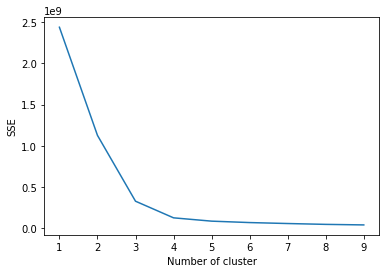

In [23]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(X)
    X["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [24]:
K=3

In [32]:
kmeans = KMeans(n_clusters=K, max_iter=100).fit(X)
X["clusters"] = kmeans.labels_

In [33]:
X.shape

(96453, 30)

In [34]:
x=pd.get_dummies(X,columns=['clusters'])

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=7)

 before  adding cluster column linear value is 3.5993  ,,,
 before  adding cluster column randomforest value is 2.32773

In [40]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('Score of rmse in linerar:',rmse)

Score of rmse in linerar: 3.442110442457538


In [41]:
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('Score of rmse in randomforest:',rmse)

Score of rmse in randomforest: 2.329027377482849
